## 1️⃣ Import Required Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## 2️⃣ Load the Dataset

In [15]:
df = pd.read_csv('car data.csv')

# Display first five rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 3️⃣ Data Preprocessing

In [3]:
# Encode categorical variables into numerical values
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Seller_Type'] = df['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

### Feature Engineering

In [4]:
# Convert car manufacturing year into car age
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2.85,4.15,5200,0,0,0,0,14
4,swift,4.60,6.87,42450,1,0,0,0,11


## 4️⃣ Define Features and Target

In [16]:
X = df.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

## 5️⃣ Train/Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2
)

## 6️⃣ Linear Regression Model

In [7]:
# Initialize and train Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# Make predictions
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

# Evaluate model performance using R² score
print('Linear Regression R² Train:', metrics.r2_score(y_train, y_train_pred))
print('Linear Regression R² Test :', metrics.r2_score(y_test, y_test_pred))

Linear Regression R² Train: 0.8799451660493707
Linear Regression R² Test : 0.836576671502498


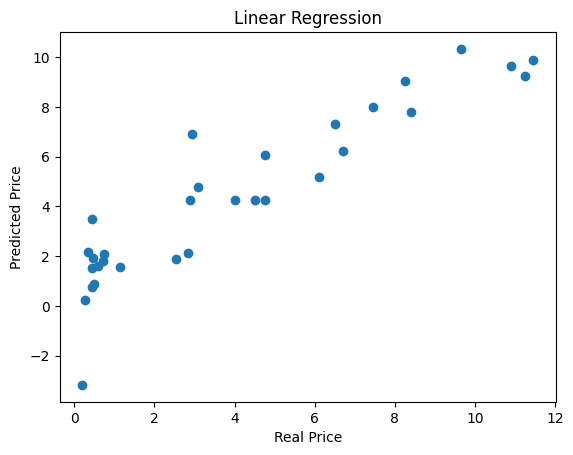

In [8]:
# Visualize real vs predicted prices
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.show()

## 7️⃣ Lasso Regression (with Feature Scaling)

In [9]:
# Standardize features (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

print('Lasso R² Train:', metrics.r2_score(y_train, y_train_pred_lasso))
print('Lasso R² Test :', metrics.r2_score(y_test, y_test_pred_lasso))

Lasso R² Train: 0.8781823475754125
Lasso R² Test : 0.849936636145947


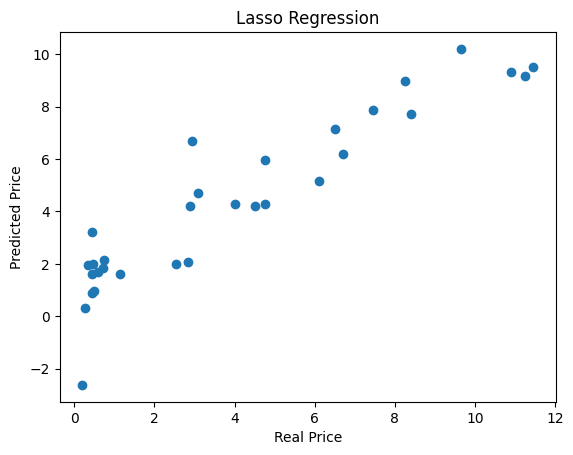

In [13]:
plt.figure()
plt.scatter(y_test, y_test_pred_lasso)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression')
plt.show()